# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

1. Using some search strategies to sort the pathes.
2. The cost between the two points are positive.

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

IDDFS is the optimal solution since it uses the DFS with limited depth，which combines the advantages of DFS and BFS.

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

If we need to find the shortest path, BFS is better than DFS. If we need to know whether two points are connected and suppose the two points are very far away from each other, we'd better use DFS.

##### 2.4 When can we use machine learning ?

When we have enough data and we need to find some rules using data. We can use machine leaning to find the rules and do some predictions or classifications.

##### 2.5 What is the gradient of a function ?

'Gradient' means derivative.

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

we can find the maximum value by choosing a point randomly, then going in the direction where the slope is increasing. When the slope approaches to zero, maybe it's the maximum or local maximum value.

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

### 这里选择了上海地铁的线路进行爬取，因为对上海地铁比较熟悉，比较好判断答案是不是有问题

In [1]:

import os
import pandas as pd
import numpy as np
import json
import urllib
import requests
import re

In [3]:
##获取站点名字
return_data = requests.get('http://service.shmetro.com/skin/js/pca.js')
tem = return_data.text
pauth = re.compile('var stations = {(.*?)}', re.S)
tem = re.findall(pauth, return_data.text)
tmp_new = tem[0].split(',')
station_name = {}
for i,info in enumerate(tmp_new):
    num = re.findall('\w+',info)[0]
    sta = re.findall('\w+',info)[1]
    station_name[num] = sta
    
station_name

{'0111': '莘庄',
 '0112': '外环路',
 '0113': '莲花路',
 '0114': '锦江乐园',
 '0115': '上海南站',
 '0116': '漕宝路',
 '0117': '上海体育馆',
 '0118': '徐家汇',
 '0119': '衡山路',
 '0120': '常熟路',
 '0121': '陕西南路',
 '0122': '黄陂南路',
 '0123': '人民广场',
 '0124': '新闸路',
 '0125': '汉中路',
 '0126': '上海火车站',
 '0127': '中山北路',
 '0128': '延长路',
 '0129': '上海马戏城',
 '0130': '汶水路',
 '0131': '彭浦新村',
 '0132': '共康路',
 '0133': '通河新村',
 '0134': '呼兰路',
 '0135': '共富新村',
 '0136': '宝安公路',
 '0137': '友谊西路',
 '0138': '富锦路',
 '0234': '徐泾东',
 '0235': '虹桥火车站',
 '0236': '虹桥2号航站楼',
 '0237': '淞虹路',
 '0238': '北新泾',
 '0239': '威宁路',
 '0240': '娄山关路',
 '0241': '中山公园',
 '0242': '江苏路',
 '0243': '静安寺',
 '0244': '南京西路',
 '0245': '人民广场',
 '0246': '南京东路',
 '0247': '陆家嘴',
 '0248': '东昌路',
 '0249': '世纪大道',
 '0250': '上海科技馆',
 '0251': '世纪公园',
 '0252': '龙阳路',
 '0253': '张江高科',
 '0254': '金科路',
 '0255': '广兰路',
 '0256': '唐镇',
 '0257': '创新中路',
 '0258': '华夏东路',
 '0259': '川沙',
 '0260': '凌空路',
 '0261': '远东大道',
 '0262': '海天三路',
 '0263': '浦东国际机场',
 '0311': '上海南站',
 '0312': '石龙路',
 '

### 这边爬出来的站点全是由数字代号表示，且一个站点如果是换乘的话会有多个代号可以表示，所以先把站点名字爬下来，后续把数字替换成站点名字，方便操作

In [4]:
##获取经纬度
return_data = requests.get('http://service.shmetro.com/skin/js/pca.js')
tem = return_data.text
pauth = re.compile('var gis = {(.*?)}', re.S)
tem = re.findall(pauth, return_data.text)
tmp_new = tem[0].split(',')
station_gis = {}
for i,_ in enumerate(tmp_new[:-1]):
    if i% 2 == 0:
        station = re.findall('\d+.\d+',tmp_new[i])[0]
        x = re.findall('\d+.\d+',tmp_new[i])[1]
        y = re.findall('\d+.\d+',tmp_new[i+1])[0]
        x_y = tuple(map(float,(x,y)))
        station_gis[station_name[station]] = x_y
        
station_gis

{'莘庄': (121.391832, 31.116809),
 '外环路': (121.399814, 31.126929),
 '莲花路': (121.409334, 31.136734),
 '锦江乐园': (121.42068, 31.148312),
 '上海南站': (121.437159, 31.159648),
 '漕宝路': (121.44187, 31.175383),
 '上海体育馆': (121.443402, 31.188814),
 '徐家汇': (121.442314, 31.201202),
 '衡山路': (121.453247, 31.211777),
 '常熟路': (121.456628, 31.219964),
 '陕西南路': (121.464494, 31.220991),
 '黄陂南路': (121.479798, 31.228753),
 '人民广场': (121.481738, 31.238695),
 '新闸路': (121.474802, 31.244699),
 '汉中路': (121.465, 31.247808),
 '上海火车站': (121.46396, 31.255155),
 '中山北路': (121.465616, 31.265275),
 '延长路': (121.461893, 31.27806),
 '上海马戏城': (121.458503, 31.285845),
 '汶水路': (121.456458, 31.29917),
 '彭浦新村': (121.455097, 31.312943),
 '共康路': (121.453464, 31.325355),
 '通河新村': (121.447817, 31.337798),
 '呼兰路': (121.444185, 31.345991),
 '共富新村': (121.440458, 31.361557),
 '宝安公路': (121.437357, 31.376207),
 '友谊西路': (121.434336, 31.38774),
 '富锦路': (121.43103, 31.398683),
 '徐泾东': (121.307524, 31.195431),
 '虹桥火车站': (121.32795, 31.1991),
 '虹桥2

In [6]:
##爬取地铁线路信息，一共十七条线路加上浦江线
return_data = requests.get('http://service.shmetro.com/skin/js/pca.js')
pauth = re.compile('var lines = {\r\n(.*?)\r\n}', re.S)
tem = re.findall(pauth, return_data.text)
tmp_new = tem[0].split("\r\n")
from collections import defaultdict
line_sta = defaultdict(list)
for i,_ in enumerate(tmp_new):
        info = re.findall('\w+',tmp_new[i])
        line = info[0]
        line_sta[line] +=list(info[x] for x in range(1,len(info)))
line_sta_name = defaultdict(list)
for i,_ in enumerate(tmp_new):
        info = re.findall('\w+',tmp_new[i])
        line = info[0]
        line_sta_name[line] +=list(station_name[info[x]] for x in range(1,len(info)))
        
line_sta_name["1号线"]

['莘庄',
 '外环路',
 '莲花路',
 '锦江乐园',
 '上海南站',
 '漕宝路',
 '上海体育馆',
 '徐家汇',
 '衡山路',
 '常熟路',
 '陕西南路',
 '黄陂南路',
 '人民广场',
 '新闸路',
 '汉中路',
 '上海火车站',
 '中山北路',
 '延长路',
 '上海马戏城',
 '汶水路',
 '彭浦新村',
 '共康路',
 '通河新村',
 '呼兰路',
 '共富新村',
 '宝安公路',
 '友谊西路',
 '富锦路']

In [9]:
##接下来需要把每个站点的上一站和下一站和改站点关联起来，是为了做graph
change_lines = defaultdict(list)
for stations in line_sta.values():
    for i,station in enumerate(stations):
        if i==0:
            change_lines[station_name[station]].append(station_name[stations[i+1]])
        elif i==len(stations)-1:
            change_lines[station_name[station]].append(station_name[stations[i-1]])
        else:
            change_lines[station_name[station]].append(station_name[stations[i+1]])
            change_lines[station_name[station]].append(station_name[stations[i-1]])
            
change_lines["大连路"]

['杨树浦路', '临平路', '江浦公园', '提篮桥']

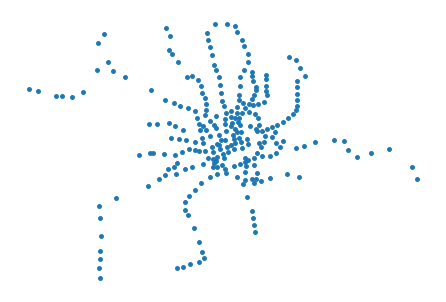

In [10]:
import networkx as nx
%matplotlib inline

station_graph = nx.Graph()  
station_graph.add_nodes_from(list(station_gis.keys()))
nx.draw(station_graph, station_gis, with_labels=False, node_size=15) # draw a graph of station location

In [12]:
def bfs_search(graph,start,destination):
    pathes = [[start]]
    visited = set()
    while pathes:
        bfs_path = pathes.pop(0)
        frontier = bfs_path[-1]
        for place in graph[frontier]:
            if place in bfs_path: continue
                
            new_path = bfs_path + [place]
            pathes.append(new_path)
            
            if place == destination:
                return new_path
            
        visited.add(frontier)


def get_key (dict, value):
    return [k for k, v in dict.items() if v == value]

def search(start,destination):
    path = bfs_search(change_lines,start,destination)
    return " -> ".join(x for x in path)

In [13]:
path = search("江浦公园",'杨思')
path

'江浦公园 -> 大连路 -> 杨树浦路 -> 浦东大道 -> 世纪大道 -> 浦电路 -> 蓝村路 -> 上海儿童医学中心 -> 临沂新村 -> 高科西路 -> 东明路 -> 成山路 -> 杨思'

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

### 再建立一个字典，把地铁线路信息加在每一个站点的后面，这里为了方便操作，按照顺序给地铁编号。

In [17]:
change_lines_no = defaultdict(list)
for k,stations in enumerate(line_sta.values()):
    for i,station in enumerate(stations):
        if i==0:
            change_lines_no[station_name[station]].append((station_name[stations[i+1]],k))
        elif i==len(stations)-1:
            change_lines_no[station_name[station]].append((station_name[stations[i-1]],k))
        else:
            change_lines_no[station_name[station]].append((station_name[stations[i+1]],k))
            change_lines_no[station_name[station]].append((station_name[stations[i-1]],k))
            
change_lines_no

defaultdict(list,
            {'莘庄': [('外环路', 0), ('春申路', 4)],
             '外环路': [('莲花路', 0), ('莘庄', 0)],
             '莲花路': [('锦江乐园', 0), ('外环路', 0)],
             '锦江乐园': [('上海南站', 0), ('莲花路', 0)],
             '上海南站': [('漕宝路', 0), ('锦江乐园', 0), ('石龙路', 2)],
             '漕宝路': [('上海体育馆', 0), ('上海南站', 0), ('龙漕路', 11), ('桂林公园', 11)],
             '上海体育馆': [('徐家汇', 0), ('漕宝路', 0), ('宜山路', 3)],
             '徐家汇': [('衡山路', 0),
              ('上海体育馆', 0),
              ('肇嘉浜路', 8),
              ('宜山路', 8),
              ('上海游泳馆', 10),
              ('交通大学', 10)],
             '衡山路': [('常熟路', 0), ('徐家汇', 0)],
             '常熟路': [('陕西南路', 0), ('衡山路', 0), ('肇嘉浜路', 6), ('静安寺', 6)],
             '陕西南路': [('黄陂南路', 0),
              ('常熟路', 0),
              ('新天地', 9),
              ('上海图书馆', 9),
              ('南京西路', 11),
              ('嘉善路', 11)],
             '黄陂南路': [('人民广场', 0), ('陕西南路', 0)],
             '人民广场': [('新闸路', 0),
              ('黄陂南路', 0),
              ('南京东路', 1),
   

### 接下来就很容易啦，定义一个获得两个站点之间坐几号线的函数

In [21]:
def line_no_change(sta1,sta2):
    for stas,l in change_lines_no[sta1]:
        if stas ==sta2:
            return l

line_no_change("江浦公园","大连路")

11

### 有一个set记录换乘了几条线，下面的search方法综合考虑了最后结果的站点数目和换乘情况，如果站点数目大于第一次获得线路结果两站以上，就会被排除，最后得到所有可能的站点比较少的线路以后再由换乘数目进行排序

In [26]:
def sort_by_station(pathes):
    def get_of_path(path):
        sta_no = set()
        for i,sta in enumerate(path[:-1]):
            sta_no.add(line_no_change(path[i],path[i+1]))
            
        return len(sta_no)
    return sorted(pathes, key=get_of_path)

def opt_bfs_search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()
    pathes_find = []
    while pathes:
        bfs_path = pathes.pop(0)
        if pathes_find and len(bfs_path)> 2+len(pathes_find[0]): continue
        frontier = bfs_path[-1]
        for place in graph[frontier]:
            if place in bfs_path: continue
                
            new_path = bfs_path + [place]
            pathes.append(new_path)
            
            if place == destination:
                pathes_find.append(new_path)
            
        visited.add(frontier)
#     print(pathes_find)
    pathes_find = search_strategy(pathes_find)
    return pathes_find[0]
        
def opt_search(start,destination):
    path = opt_bfs_search_2(change_lines,start,destination,search_strategy = sort_by_station)
    return " -> ".join(x for x in path)


In [27]:
path = opt_search("江浦公园",'杨思')
print("best_path:{}".format(path))

best_path:江浦公园 -> 大连路 -> 提篮桥 -> 国际客运中心 -> 天潼路 -> 曲阜路 -> 人民广场 -> 大世界 -> 老西门 -> 陆家浜路 -> 西藏南路 -> 中华艺术宫 -> 耀华路 -> 成山路 -> 杨思


### 这条线路应该是最优的，因为我每天上班就是这么换乘的。

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 